In [25]:
import pandas as pd

def count_annotations(tsv_file_path):
    # Read the TSV file into a DataFrame
    df = pd.read_csv(tsv_file_path, sep='\t', header=None)
    
    # Count occurrences of each unique value in the third column
    occurrences = df[2].value_counts().to_dict()
    
    return occurrences

In [26]:
import matplotlib.pyplot as plt

def plot_comparison(dict1, dict2, label1='Dataset 1', label2='Dataset 2', title='Comparison of Values'):
    # Get the unique keys from both dictionaries
    all_keys = sorted(set(dict1.keys()).union(set(dict2.keys())))
    
    # Get the counts for each key in both dictionaries, filling in 0 if the key is missing
    counts1 = [dict1.get(key, 0) for key in all_keys]
    counts2 = [dict2.get(key, 0) for key in all_keys]
    
    # Set up the positions and width for the bars
    x = range(len(all_keys))
    width = 0.35  # Width of the bars
    
    # Create the bar chart
    fig, ax = plt.subplots()
    bars1 = ax.bar([i - width/2 for i in x], counts1, width, label=label1)
    bars2 = ax.bar([i + width/2 for i in x], counts2, width, label=label2)
    
    # Add labels, title, and legend
    ax.set_xlabel('Post Type')
    ax.set_ylabel('Counts')
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(all_keys, rotation=45, ha='right')
    ax.legend()
    
    # Show the count on top of each bar
    for bar in bars1 + bars2:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')
    
    # Display the plot
    plt.tight_layout()
    #plt.show()
    plt.savefig('results.png')

In [27]:
results = count_annotations("final_labeled_dataset_concordia.tsv"), count_annotations("final_labeled_dataset_mcgill.tsv")

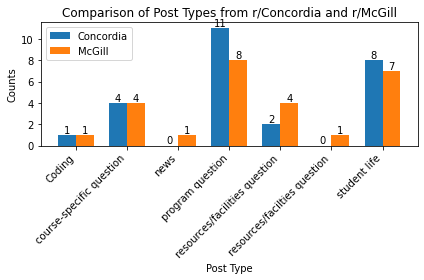

In [28]:
plot_comparison(results[0], results[1], label1='Concordia', label2='McGill', title='Comparison of Post Types from r/Concordia and r/McGill')